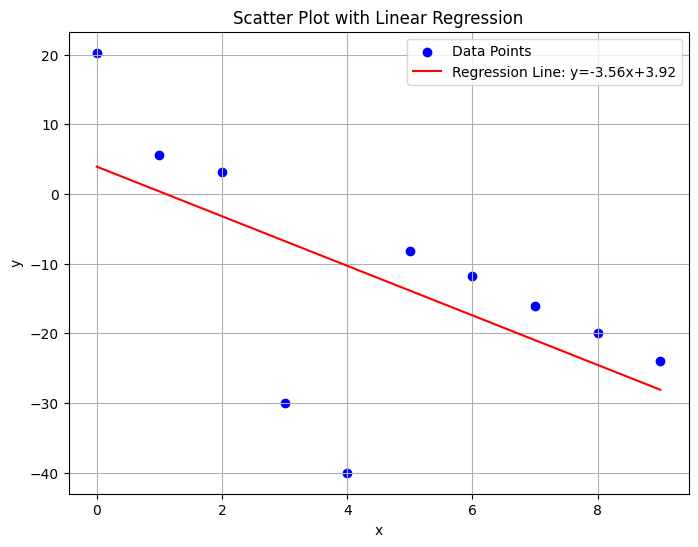

Robust loss values for Task 4 (by beta):
Beta=1: Model 1 Loss=0.435416, Model 2 Loss=0.972847
Beta=1e-06: Model 1 Loss=1.000000, Model 2 Loss=1.000000
Beta=1000.0: Model 1 Loss=0.000227, Model 2 Loss=0.000188


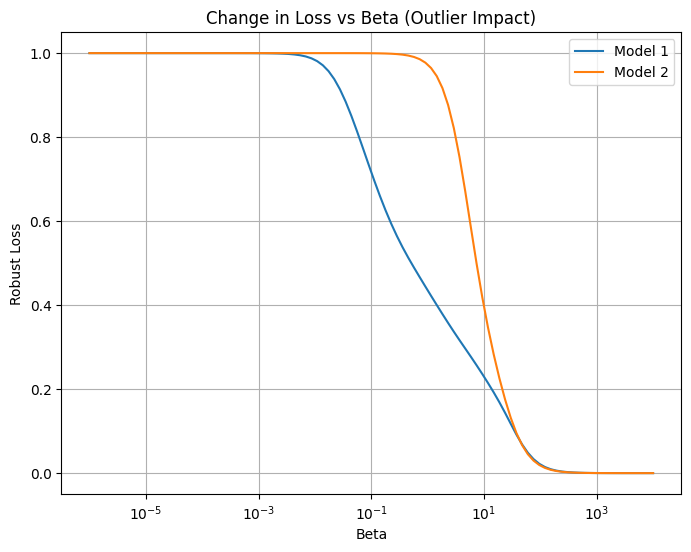

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Task 2: Data and Linear Regression ---
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Fit regression line (Model 2 is given as -3.55x + 3.91)
coeffs = np.polyfit(x, y, 1)
slope = coeffs[0]
intercept = coeffs[1]
reg_line = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, reg_line, color='red', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# --- Task 4: Robust Loss Calculations for Both Models ---
def robust_loss(true_y, pred_y, beta):
    """Calculate robust loss for a set of predictions."""
    residuals = true_y - pred_y
    numerator = residuals ** 2
    denominator = numerator + beta ** 2
    return np.mean(numerator / denominator)

# Model 1: y = -4x + 12
model1_pred = -4 * x + 12
# Model 2: y = -3.55x + 3.91
model2_pred = -3.55 * x + 3.91

betas = [1, 1e-6, 1e3]
loss_results = []
for beta in betas:
    loss1 = robust_loss(y, model1_pred, beta)
    loss2 = robust_loss(y, model2_pred, beta)
    loss_results.append({'beta': beta, 'Model 1': loss1, 'Model 2': loss2})

# Print loss results for each beta
print("Robust loss values for Task 4 (by beta):")
for r in loss_results:
    print(f"Beta={r['beta']}: Model 1 Loss={r['Model 1']:.6f}, Model 2 Loss={r['Model 2']:.6f}")

# --- Task 8: Example Huber Loss ---
def huber_loss(true_y, pred_y, delta):
    """Calculate Huber loss for an array of predictions."""
    residual = np.abs(true_y - pred_y)
    quad = (residual <= delta)
    return np.mean(np.where(quad, 0.5 * residual ** 2, delta * (residual - 0.5 * delta)))

# Demo: Compute Huber loss (not required in print but available for use)
huber_example = huber_loss(y, model2_pred, delta=1)

# --- Task 7: Demonstrate Outlier Effect Reduction ---
def show_loss_change(beta_values):
    plt.figure(figsize=(8, 6))
    l1 = [robust_loss(y, model1_pred, b) for b in beta_values]
    l2 = [robust_loss(y, model2_pred, b) for b in beta_values]
    plt.plot(beta_values, l1, label='Model 1')
    plt.plot(beta_values, l2, label='Model 2')
    plt.xlabel('Beta')
    plt.ylabel('Robust Loss')
    plt.xscale('log')
    plt.title('Change in Loss vs Beta (Outlier Impact)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example plot: how loss changes as beta increases (outliers reduced)
show_loss_change(np.logspace(-6, 4, 100))
